## Project Name: Lending Club Case Study

<strong>General Information:</strong>
<li>Lending club case study is analysis of various factors on loan repayment. The insights of this analysis will help banks to identify if a person is likely to replay loan or not.</li>

<li>The idea behind implementing this project is to underatand how real business problems are solved using EDA. Apart from applying EDA techniques, we also learnt about risk analytics in banking and financial services.</li>

<li>Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.</li>

<li>Loan data set contains the complete loan data for all loans issued through the time period 2007 to 2011.</li>

<strong>Group Facilitator:</strong><br />Name: Narendra Jha<br />
                           Email ID: narendra.jha@live.com<br />
                           Phone no:  9990227116              
                           
<strong>Team Member Detail:</strong><br />Name: Mohammad Monis<br />
                                Email ID: javedmonis07@gmail.com<br />
                                Phone no: 9642234275

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing loan data into dataframe
loan_data = pd.read_csv("loan.csv", low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Check data info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Check data type of all the columns
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
# Check NA values in all columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Check NA values % in all columns
(loan_data.isnull().sum()/(len(loan_data)))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
# Remove all columns which has only NA value
loan_data=loan_data.dropna(axis=1,how='all')

In [8]:
# Get the number of unique values in each column
unique_values = loan_data.nunique()
unique_values

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [9]:
# Get the constant columns
constant_columns = unique_values[unique_values == 1].index.tolist()
constant_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [10]:
# Remove the constant columns as these are going to help in analysis
loan_data = loan_data.drop(constant_columns, axis=1)

In [11]:
# Remove the id, member_id and url columns as they have unique values only and which is not going to help in analysis
loan_data = loan_data.drop(['id','member_id','url'], axis = 1)

In [12]:
# Creating a new column 'is_defaulter' which is 0 if loan is fully paid or current else 1 if charged off
loan_data['is_defaulter'] = loan_data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

============================================================================================================================
### <font color='red'>The problem statement specifies the need to analyze data pertaining only to defaulters. Therefore, I am filtering the dataset to focus exclusively on 'Charged Off' records for analysis.</font>
===========================================================================================================================

In [13]:
# Read the 'loan_status' column and keep only 'Charged Off' data and delete remaining as we need to study only 'Charged Off'
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [14]:
# Create new data set and store only 'Charged Off' data
charged_off_data = loan_data[loan_data['loan_status']=="Charged Off"]

In [15]:
# Show 'Charged Off' data set
charged_off_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,is_defaulter
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,1
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,...,294.94,0.0,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0,1
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,533.42,0.0,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0,1
12,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,...,570.26,0.0,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0,1
14,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,SFMTA,3 years,...,1393.42,0.0,645.10,6.3145,Oct-13,325.74,NaN,Mar-14,0.0,1


In [16]:
# Check unique value of 'int_rate'
charged_off_data['int_rate']

1        15.27%
8        21.28%
9        12.69%
12       13.49%
14       10.65%
          ...  
39667    12.80%
39668     9.64%
39669    15.01%
39678    10.59%
39688    13.43%
Name: int_rate, Length: 5627, dtype: object

In [17]:
# Replace % sign from column 'int_rate' so that we can convert as float for further analysis
charged_off_data['int_rate'] = charged_off_data['int_rate'].str.replace('%','')

In [18]:
#  Convert all continuous variables to numeric values
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
charged_off_data[numeric_columns] = charged_off_data[numeric_columns].apply(pd.to_numeric)

In [19]:
# Read column 'emp_length' and check unique value
charged_off_data['emp_length'].unique()

array(['< 1 year', '4 years', '3 years', '10+ years', '1 year', '9 years',
       '2 years', '8 years', '7 years', '5 years', nan, '6 years'],
      dtype=object)

In [20]:
# Replace 'emp_length' NA with 0
charged_off_data['emp_length'].fillna('0',inplace=True)

In [21]:
# Read the column Loan 'purpose'
charged_off_data['purpose'].unique()

array(['car', 'small_business', 'other', 'debt_consolidation',
       'major_purchase', 'credit_card', 'home_improvement', 'moving',
       'vacation', 'house', 'medical', 'wedding', 'renewable_energy',
       'educational'], dtype=object)

In [22]:
# Find total % of each 'purpose'
(charged_off_data['purpose'].value_counts()*100)/len(charged_off_data)

debt_consolidation    49.173627
other                 11.249334
credit_card            9.632131
small_business         8.441443
home_improvement       6.166696
major_purchase         3.945264
car                    2.843433
medical                1.883775
wedding                1.706060
moving                 1.634974
house                  1.048516
educational            0.995202
vacation               0.941887
renewable_energy       0.337658
Name: purpose, dtype: float64

In [23]:
# Deleting 'other' as it is not sure what it contais actually and how it will help in analysis
charged_off_data = charged_off_data[charged_off_data['purpose']!="other"]

In [24]:
# Read column 'loan_amnt' and analysis it
charged_off_data['loan_amnt']

1         2500
8         5600
12        9000
21       21000
24        6000
         ...  
39667     2500
39668     2500
39669     6500
39678     1000
39688    20000
Name: loan_amnt, Length: 4994, dtype: int64

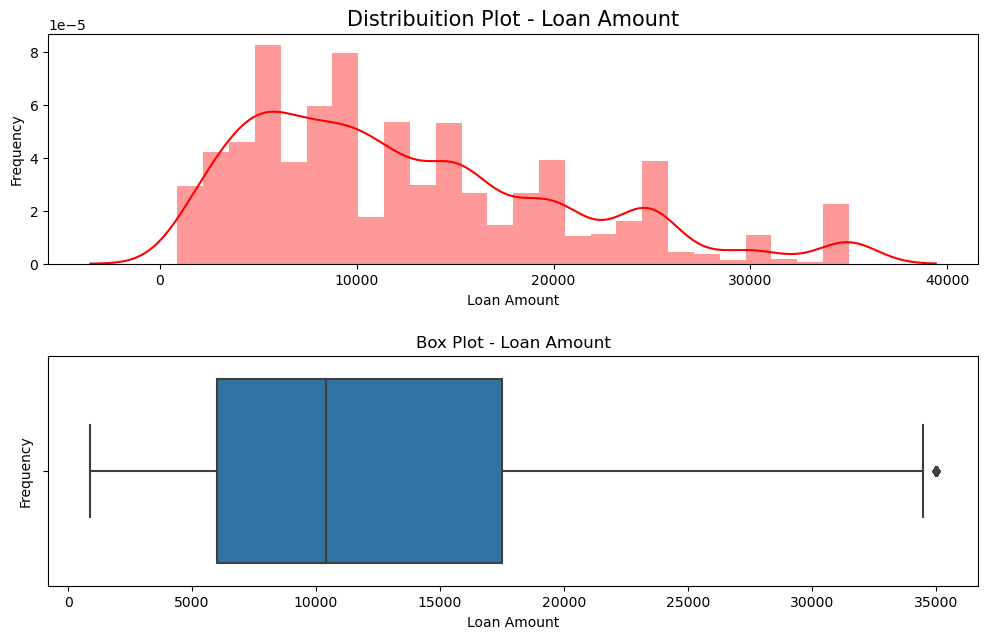

In [25]:
# Plot to show the frequency of loan amount range 
fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Distribuition Plot - Loan Amount
loan_amnt_distplot = sns.distplot(charged_off_data['loan_amnt'], ax=ax[0], color='r')
loan_amnt_distplot.set_title("Distribuition Plot - Loan Amount", fontsize=15)
loan_amnt_distplot.set_xlabel("Loan Amount")
loan_amnt_distplot.set_ylabel("Frequency")

# Box Plot - Loan Amount
loan_amnt_boxplot = sns.boxplot(data =charged_off_data, x=charged_off_data['loan_amnt'],ax=ax[1],orient='v')
loan_amnt_boxplot.set_title("Box Plot - Loan Amount")
loan_amnt_boxplot.set_xlabel("Loan Amount")
loan_amnt_boxplot.set_ylabel("Frequency")

plt.show()


<strong>Analysis Result:</strong> The above chart shows that the majority of loans fall within the range of <strong>6000 to 18000</strong>.

=====================================================================================================================

In [26]:
# Read column loan 'term' and analysis it
charged_off_data['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

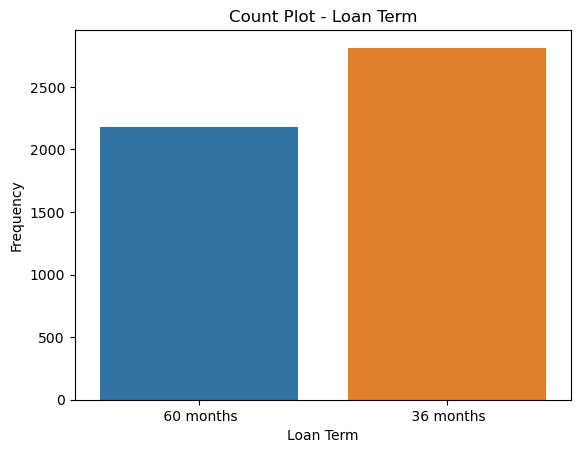

In [27]:
# Plot to show the frequency of loan term 
term_countplot = sns.countplot(charged_off_data, x="term")
term_countplot.set_title("Count Plot - Loan Term")
term_countplot.set_xlabel("Loan Term")
term_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that a significant portion of defaulters opted for a <strong>36 months</strong> loan term.

=====================================================================================================================

In [28]:
# Putting 'int_rate' to income ratio in buckets
charged_off_data['int_rate_range'] = pd.cut(charged_off_data['int_rate'], bins = 4, labels = ['5-10', '10-15', '15-20', '20+'])
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,is_defaulter
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0


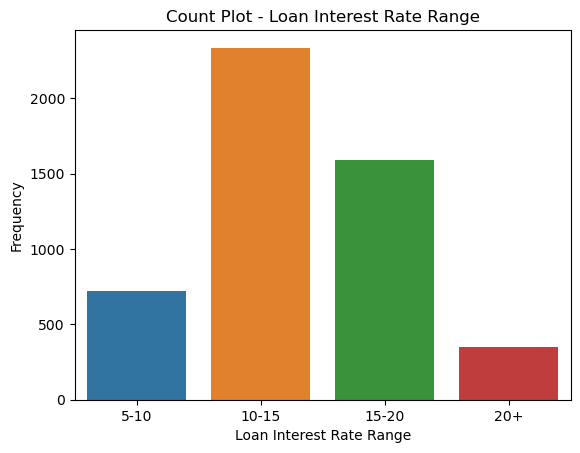

In [29]:
# Plot to show the frequency of loan int_rate_range 
int_rate_range_countplot = sns.countplot(charged_off_data, x="int_rate_range")
int_rate_range_countplot.set_title("Count Plot - Loan Interest Rate Range")
int_rate_range_countplot.set_xlabel("Loan Interest Rate Range")
int_rate_range_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who defaulted on their loans had taken loans with interest rates ranging from <strong>10-15%</strong>.

=====================================================================================================================

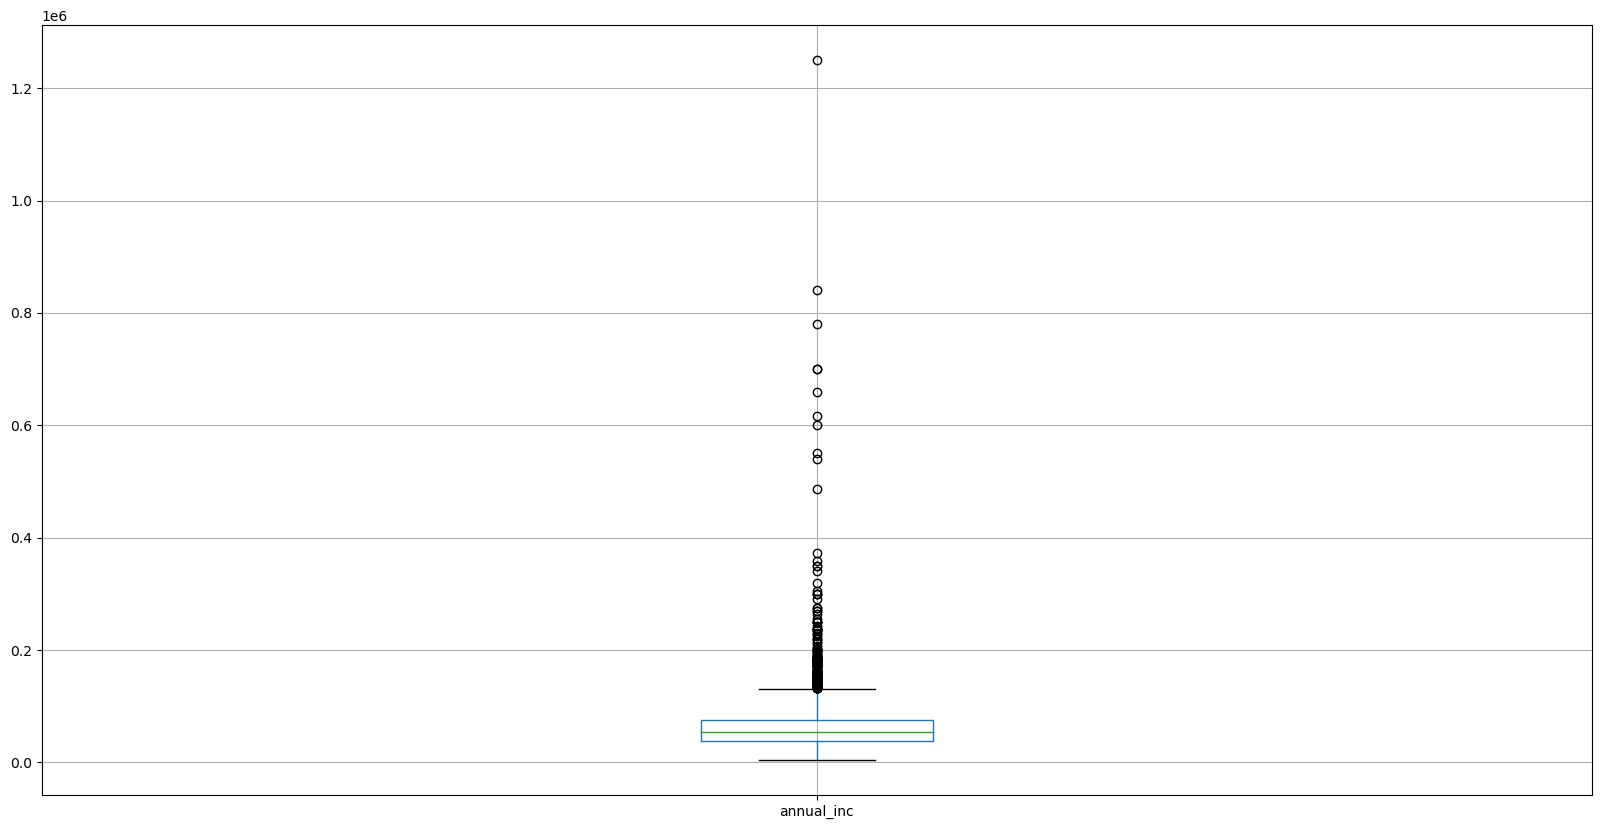

In [30]:
# Read column loan 'annual_inc' and analysis it

# Box Plot - Annual Income
charged_off_data.boxplot('annual_inc', figsize=(20,10))
plt.show()

In [31]:
# As seen in above figure, there are huge numbers of outliers in annual_inc column
# Removing outliers from data set using formula IQR*1.5 + Q3 to detect outliers
(charged_off_data['annual_inc'].quantile(0.75)-charged_off_data['annual_inc'].quantile(0.25)) * 1.5 + charged_off_data['annual_inc'].quantile(0.75)

130500.0

In [32]:
# Removing 'annual_inc' beyond 130500.0 as they are outliers
charged_off_data = charged_off_data[charged_off_data['annual_inc'] < 130500.0]

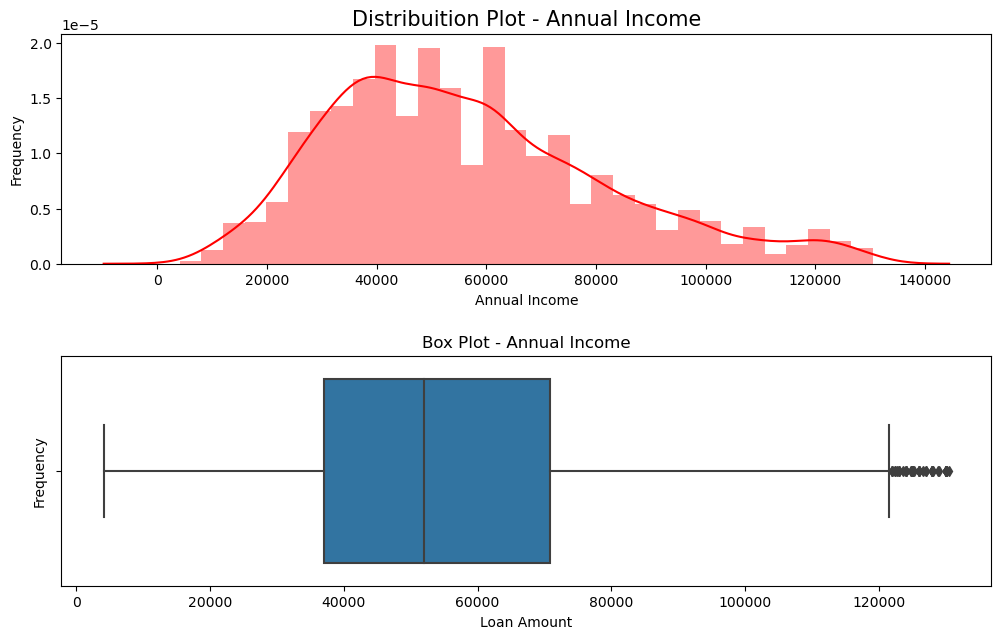

In [33]:
# Plot the 'annual_inc' once again after removing the outliers
fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Distribuition Plot - Annual Income
annual_inc_distplot = sns.distplot(charged_off_data['annual_inc'], ax=ax[0], color='r')
annual_inc_distplot.set_title("Distribuition Plot - Annual Income", fontsize=15)
annual_inc_distplot.set_xlabel("Annual Income")
annual_inc_distplot.set_ylabel("Frequency")

# Box Plot - Annual Income
annual_inc_boxplot = sns.boxplot(data =charged_off_data, x=charged_off_data['annual_inc'],ax=ax[1],orient='v')
annual_inc_boxplot.set_title("Box Plot - Annual Income")
annual_inc_boxplot.set_xlabel("Loan Amount")
annual_inc_boxplot.set_ylabel("Frequency")

plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who default on payments have an annual income ranging from <strong>40000 to 70000</strong>.

=====================================================================================================================

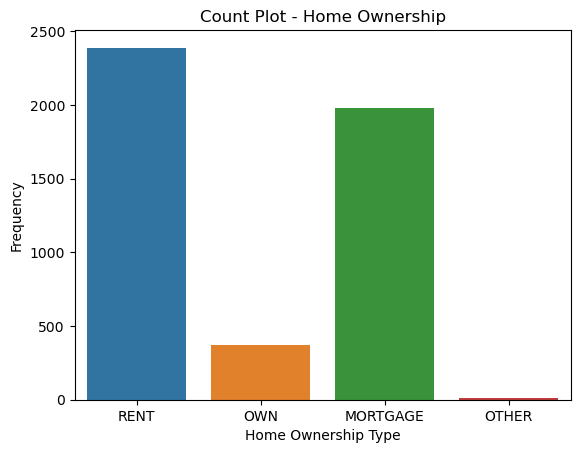

In [34]:
# Read column 'home_ownership' and analysis it

# Plot to show the frequency of home_ownership
home_ownership_countplot = sns.countplot(charged_off_data, x="home_ownership")
home_ownership_countplot.set_title("Count Plot - Home Ownership")
home_ownership_countplot.set_xlabel("Home Ownership Type")
home_ownership_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who have defaulted on their payments reside in <strong>rented</strong> accommodations.

=====================================================================================================================

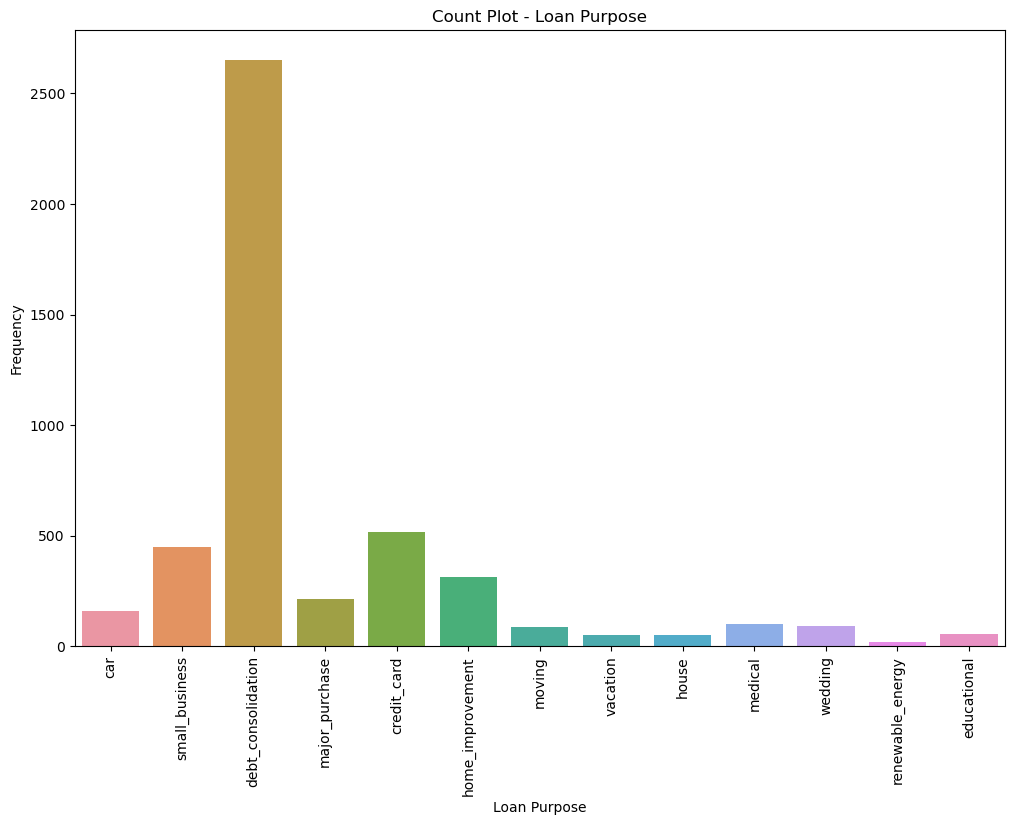

In [35]:
# Read column loan 'purpose' and analysis it

fig= plt.subplots(figsize=(12, 8))

# Plot to show the frequency of loan 'purpose'
purpose_countplot = sns.countplot(charged_off_data, x="purpose")
purpose_countplot.set_title("Count Plot - Loan Purpose")
purpose_countplot.set_xlabel("Loan Purpose")
purpose_countplot.set_ylabel("Frequency")
plt.xticks(rotation=90) 
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who defaulted on their loans used the funds for <strong>debt consolidation</strong> while the fewest number of people used the money for <strong>renewable energy</strong> purposes.

=====================================================================================================================

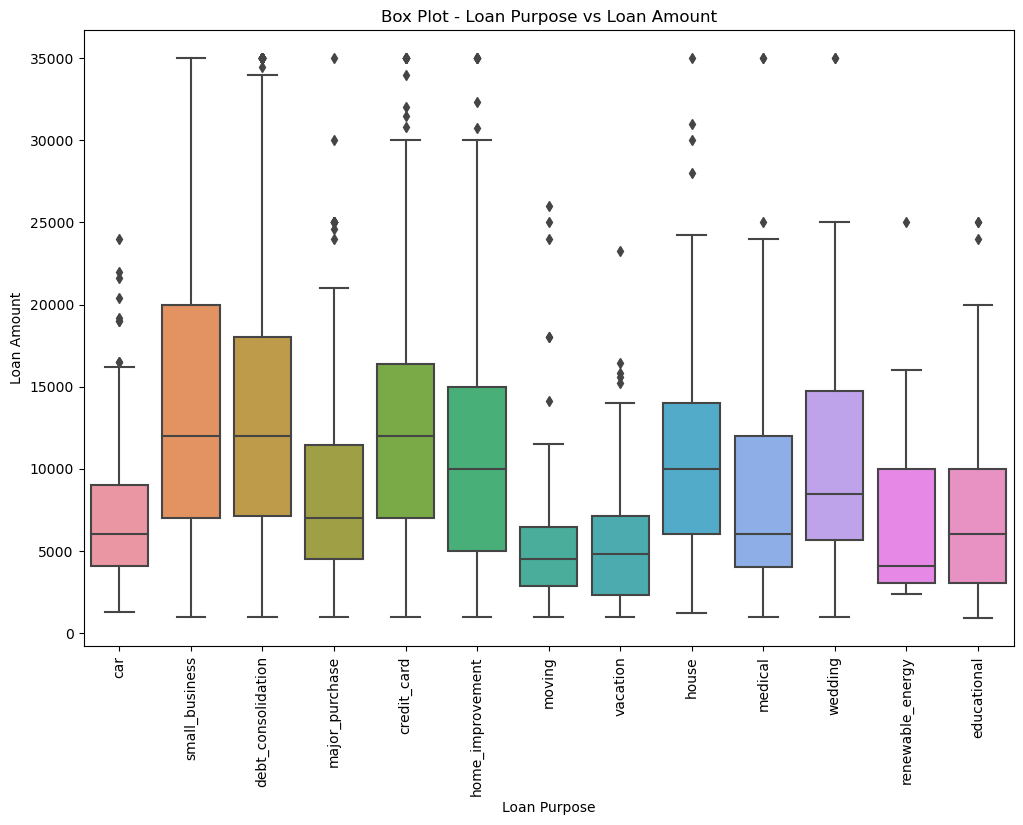

In [36]:
# Read column loan 'purpose' and 'loan_amnt' together and analysis it

fig= plt.subplots(figsize=(12, 8))

# Plot to show the frequency of loan 'purpose'
loan_amnt_vs_purpose_boxplot = sns.boxplot(data =charged_off_data, x='purpose', y='loan_amnt')
loan_amnt_vs_purpose_boxplot.set_title("Box Plot - Loan Purpose vs Loan Amount")
loan_amnt_vs_purpose_boxplot.set_xlabel("Loan Purpose")
loan_amnt_vs_purpose_boxplot.set_ylabel("Loan Amount")
plt.xticks(rotation=90) 
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of loans were allocated for <strong>Small Business</strong> purposes, while the lowest loan amounts were provided for <strong>Moving</strong> purposes.

=====================================================================================================================

In [37]:
# Reading 'loan_amnt', 'int_rate' and 'annual_inc' together to find the correlation between them and ploting on hearmap

# Create a new DataFrame object
df_loan_amnt_int_rate_annual_inc= pd.DataFrame(charged_off_data, columns=['loan_amnt', 'int_rate', 'annual_inc'])

In [38]:
# Finding the correlation between 'loan_amnt', 'int_rate' and 'annual_inc' 
df_loan_amnt_int_rate_annual_inc.corr()

,loan_amnt,int_rate,annual_inc
loan_amnt,1.000000,0.347849,0.467824
int_rate,0.347849,1.000000,0.171888
annual_inc,0.467824,0.171888,1.000000


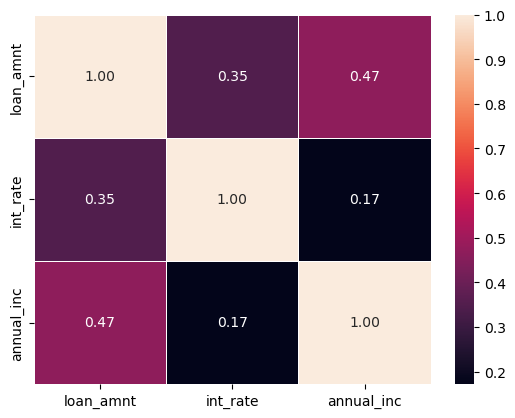

In [39]:
# Ploting 'loan_amnt', 'int_rate' and 'annual_inc'  on heat map
sns.heatmap(data=df_loan_amnt_int_rate_annual_inc.corr(),annot=True,fmt=".2f", linewidth=.5)
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the <strong>loan_amnt</strong>, <strong>int_rate</strong> and <strong>annual_inc</strong> are related together ie have <strong>positive correlation</strong>.

=====================================================================================================================

In [40]:
# Analyzing debt to income ratio on defaulter's data
charged_off_data['dti'].describe()

count    4760.000000
mean       14.225092
std         6.560054
min         0.000000
25%         9.350000
50%        14.550000
75%        19.530000
max        29.850000
Name: dti, dtype: float64

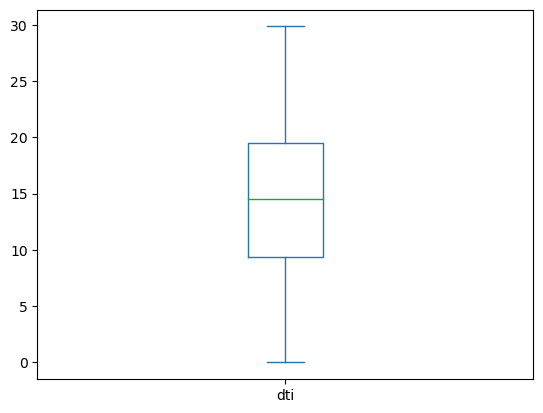

In [41]:
# Plot and Analyze it
charged_off_data['dti'].plot.box()
plt.show()

In [42]:
# Putting debt to income ration in buckets
loan_data['dti_range'] = pd.cut(loan_data['dti'], bins = 6, labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

In [43]:
loan_data['dti_range'].unique()

['25-30', '0-5', '5-10', '20-25', '15-20', '10-15']
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30']

In [44]:
# Creating data set to map debt to income ration and default rate
dti_range_data = pd.pivot_table(data = loan_data, values='is_defaulter', index=['dti_range'], aggfunc=['count'])

In [45]:
dti_range_data

,count
,is_defaulter
dti_range,
0-5,5140
5-10,8062
10-15,9893
15-20,9108
20-25,6836
25-30,678


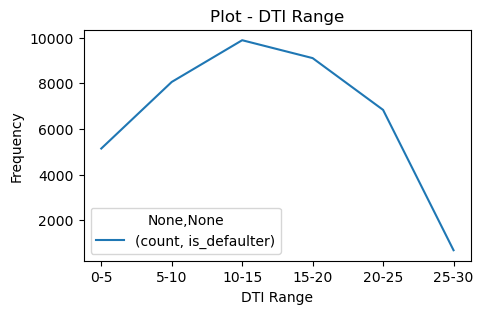

In [46]:
# Plot dti_range_data
dti_range_plot=dti_range_data.plot(kind='line', figsize=(5, 3), rot=0)
dti_range_plot.set_title("Plot - DTI Range")
dti_range_plot.set_xlabel("DTI Range")
dti_range_plot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - From above line chart we get to know that with increasing debt to income ratio the default rate also increases upto range <strong>10-15</strong> but drops after that and most drop range is at <strong>25-30</strong>. This drop might be explained with a reason that people with very high debt to income ratio dont want to increase their debt further so they mostly pay off thier loans.

=====================================================================================================================

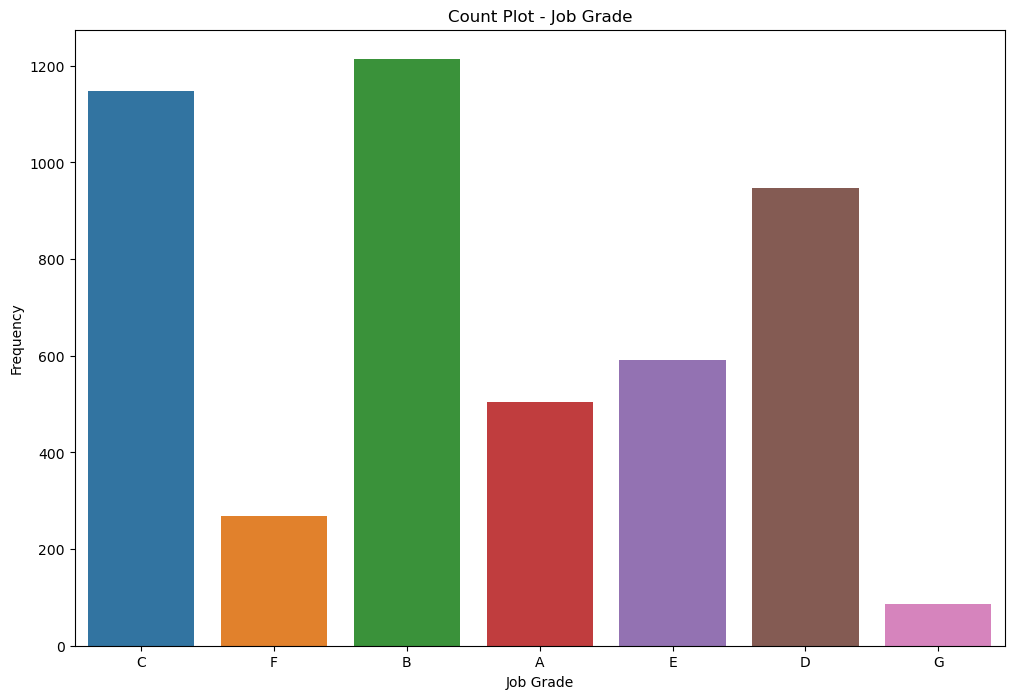

In [47]:
# Read column loan 'grade' and analysis it

fig= plt.subplots(figsize=(12, 8))

# Plot to show the frequency of loan 'purpose'
grade_countplot = sns.countplot(charged_off_data, x="grade")
grade_countplot.set_title("Count Plot - Job Grade")
grade_countplot.set_xlabel("Job Grade")
grade_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who defaulted on their payments belong to job <strong>grade B</strong>.

=====================================================================================================================

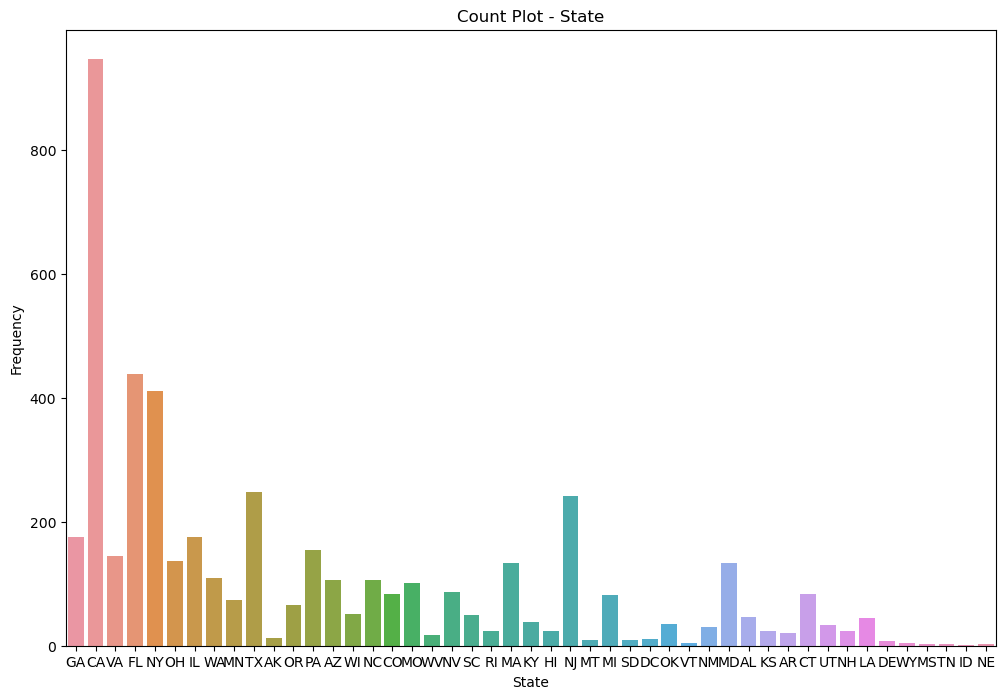

In [48]:
# Read column loan 'addr_state' and analysis it

fig= plt.subplots(figsize=(12, 8))

# Plot to show the frequency of loan 'purpose'
addr_state_countplot = sns.countplot(charged_off_data, x="addr_state")
addr_state_countplot.set_title("Count Plot - State")
addr_state_countplot.set_xlabel("State")
addr_state_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of defaulters are residents of the state <strong>CA</strong>.

=====================================================================================================================

In [49]:
# Further analys on State and Amount columns, finding whic state has most loan amount sanctioned
state_vs_loan_amount = charged_off_data.groupby(['addr_state']).agg({'loan_amnt': [np.sum]})

In [50]:
state_vs_loan_amount.head()

,loan_amnt
,sum
addr_state,
AK,187875
AL,606675
AR,211250
AZ,1277575
CA,11487550


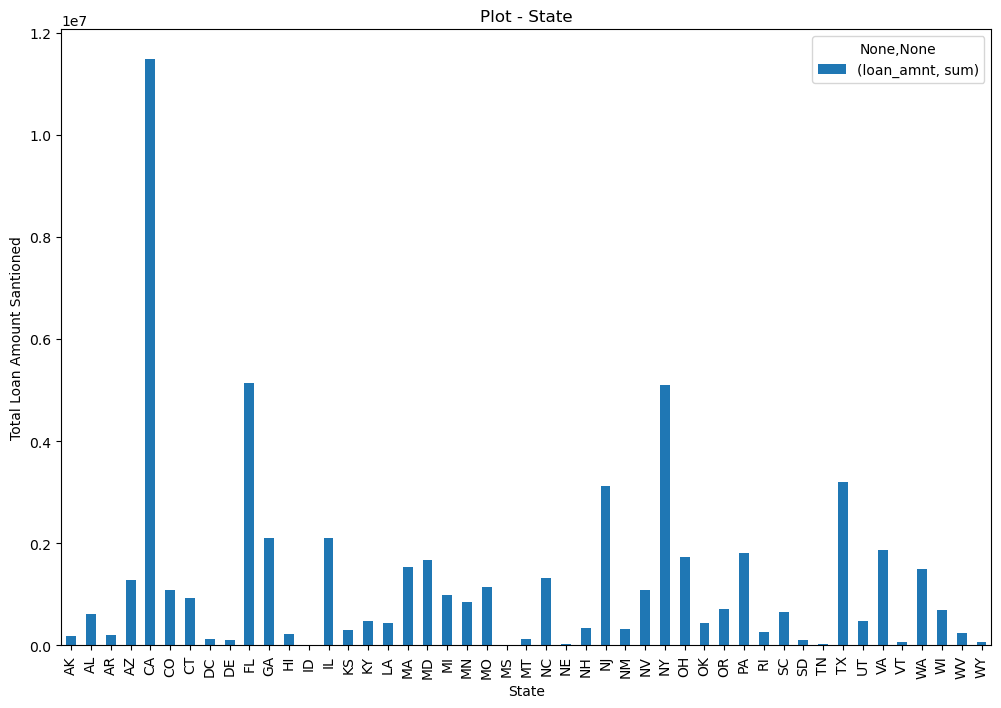

In [51]:
# Plot State vs Total Loan Santioned to each state
state_vs_loan_amount_plot =  state_vs_loan_amount.plot(kind='bar', figsize=(12, 8))
state_vs_loan_amount_plot.set_title("Plot - State")
state_vs_loan_amount_plot.set_xlabel("State")
state_vs_loan_amount_plot.set_ylabel("Total Loan Amount Santioned")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of defaulted loans were approved in the state of <strong>CA</strong>.

=====================================================================================================================

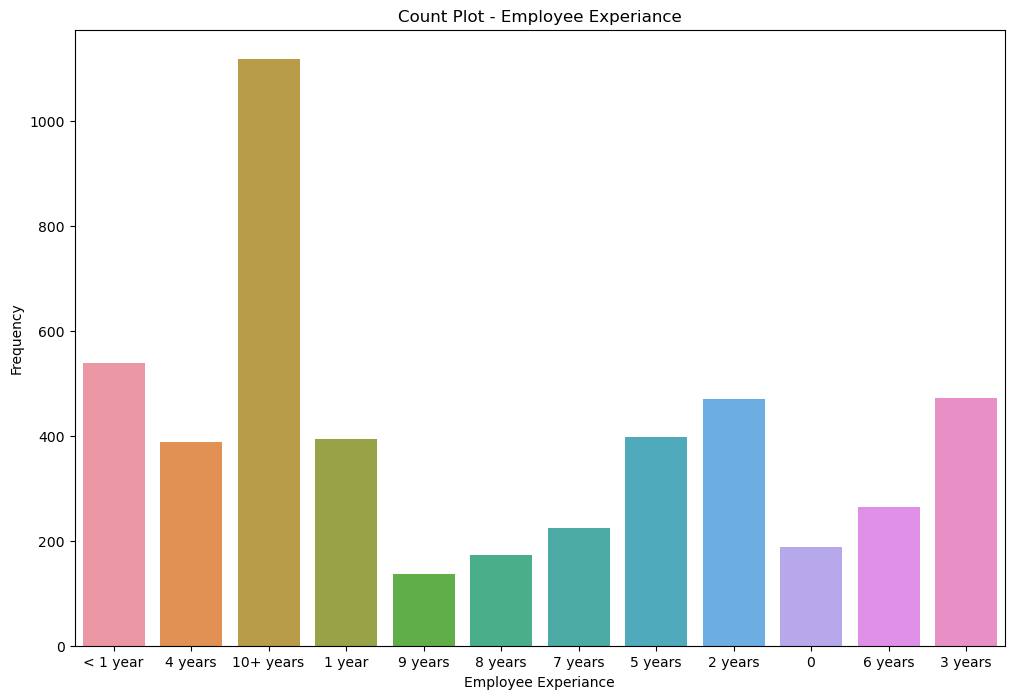

In [52]:
# Read column loan 'emp_length' and analysis it

fig = plt.subplots(figsize=(12, 8))

# Plot to show the frequency of 'emp_length'
emp_length_countplot = sns.countplot(charged_off_data, x="emp_length")
emp_length_countplot.set_title("Count Plot - Employee Experiance")
emp_length_countplot.set_xlabel("Employee Experiance")
emp_length_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who defaulted on their payments had  <strong>10+ years</strong> of work experience.

=====================================================================================================================

In [53]:
# Read column loan 'issue_d' and analysis it
charged_off_data['issue_d'].head()

1     Dec-11
8     Dec-11
12    Dec-11
21    Dec-11
24    Dec-11
Name: issue_d, dtype: object

In [54]:
# Convert this column as datetime
charged_off_data['issue_d']  =  pd.to_datetime(charged_off_data['issue_d'], format='%b-%y')

In [55]:
charged_off_data["issue_year"] = charged_off_data['issue_d'].dt.year

In [56]:
charged_off_data["issue_month"] = charged_off_data['issue_d'].dt.month

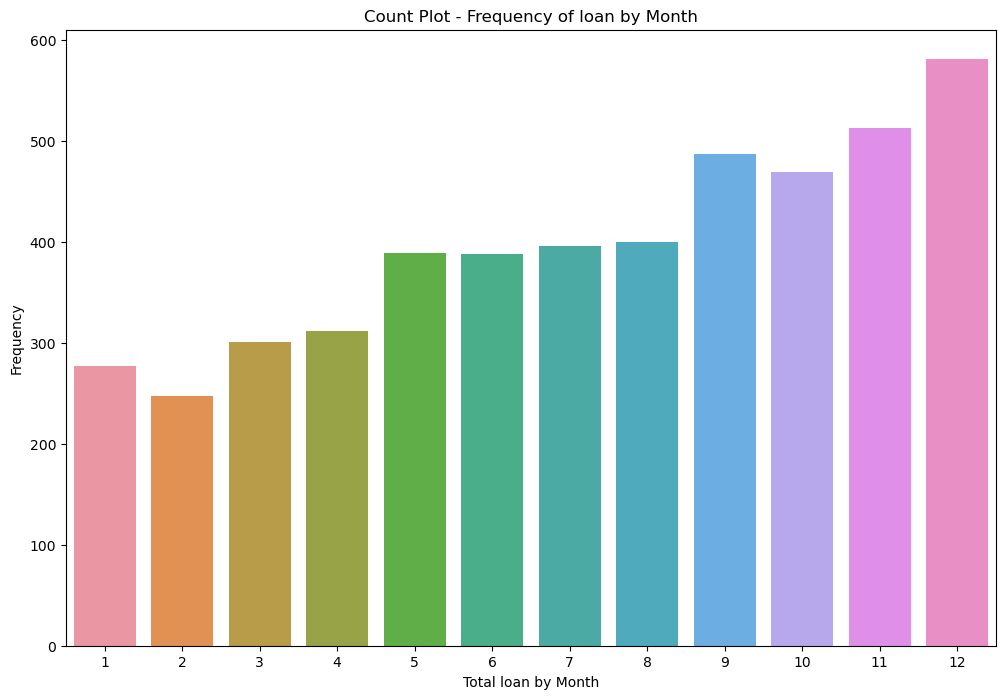

In [57]:
# Plot to show the frequency of loan by issue 'Month'

fig = plt.subplots(figsize=(12, 8))

issue_month_countplot = sns.countplot(charged_off_data, x="issue_month")
issue_month_countplot.set_title("Count Plot - Frequency of loan by Month")
issue_month_countplot.set_xlabel("Total loan by Month")
issue_month_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that a majority of defaulted loans were approved in the month of <strong>December</strong>.

=====================================================================================================================

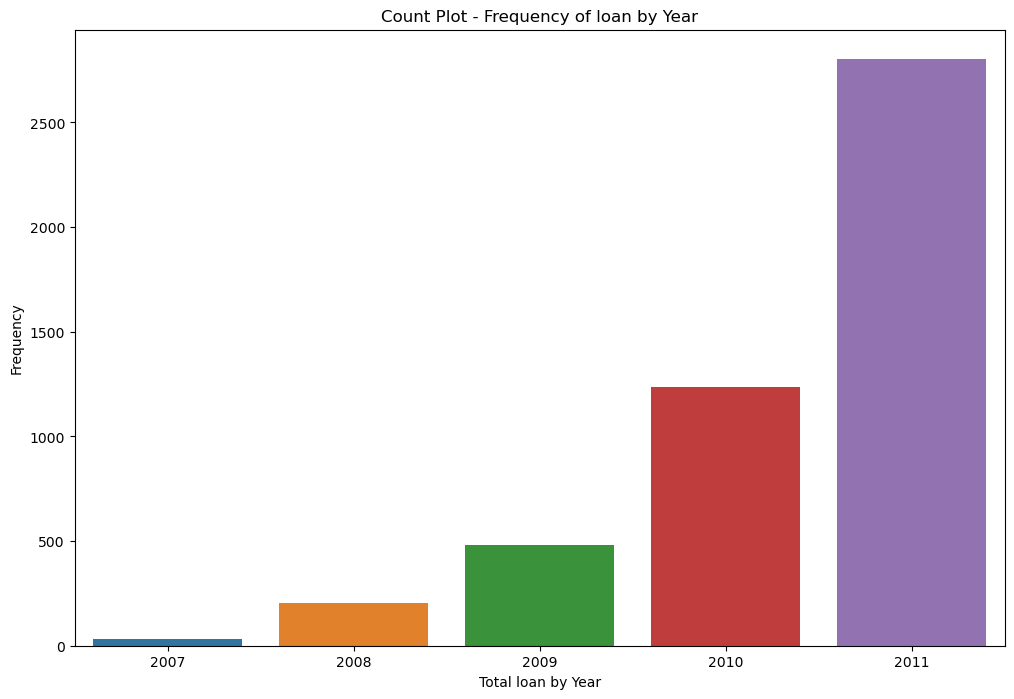

In [58]:
# Plot to show the frequency of loan by Issue 'Year'

fig = plt.subplots(figsize=(12, 8))

issue_year_countplot = sns.countplot(charged_off_data, x="issue_year")
issue_year_countplot.set_title("Count Plot - Frequency of loan by Year")
issue_year_countplot.set_xlabel("Total loan by Year")
issue_year_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of loans given to defaulters were approved in the year <strong>2011</strong>.


=========================================================================================================================


### Conclusions:
<li>Majority of loans fall within the range of <strong>6000 to 18000</strong>.</li>
<li>Significant portion of defaulters opted for a <strong>36 months</strong> loan term.</li>
<li>Majority of individuals who defaulted on their loans had taken loans with interest rates ranging from <strong>10-15%</strong>.</li>
<li>Majority of individuals who default on payments have an annual income ranging from <strong>40000 to 70000</strong>.</li>
<li>Majority of individuals who have defaulted on their payments reside in <strong>rented</strong> accommodations.</li>
<li>Majority of individuals who defaulted on their loans used the funds for <strong>debt consolidation</strong> while the fewest number of people used the money for <strong>renewable energy</strong> purposes.</li>
<li>Majority of loans were allocated for <strong>Small Business</strong> purposes, while the lowest loan amounts were provided for <strong>Moving</strong> purposes.</li>
<li><strong>loan_amnt</strong>, <strong>int_rate</strong> and <strong>annual_inc</strong> are related together ie have <strong>positive correlation</strong>.</li>
<li>Increasing debt to income ratio the default rate also increases upto range <strong>10-15</strong> but drops after that and most drop range is at <strong>25-30</strong>. This drop might be explained with a reason that people with very high debt to income ratio dont want to increase their debt further so they mostly pay off thier loans.</li>
<li>Majority of individuals who defaulted on their payments belong to job <strong>grade B</strong>.</li>
<li>Majority of defaulters are residents of the state <strong>CA</strong>.</li>
<li>Majority of defaulted loans were approved in the state of <strong>CA</strong>.</li>
<li>Majority of individuals who defaulted on their payments had  <strong>10+ years</strong> of work experience.</li>
<li>Majority of defaulted loans were approved in the month of <strong>December</strong>.</li>
<li>Majority of loans given to defaulters were approved in the year <strong>2011</strong>.</li>
